In [3]:
from mod_my_utils.test_methods import get_price_csv, get_price_yahoo

In [4]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [5]:
print(symbols)

['HDFC', 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']


In [6]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
datasource = data_source
print(start_date)
print(end_date)
print(symbol)
print(datasource)

1/1/2010
1/1/2015
HDFC
yahoo


In [17]:
folder_name = 'desktop'
stock = 'AAPL'
index_col = 'Date'

In [19]:
get_price_csv(folder_name, stock, index_col)

stock name:  AAPL


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,175.05,175.08,173.34,174.0900,20536313.0,0.0,1.0,175.050000,175.080000,173.340000,174.090000,20536313.0
2017-11-28,174.30,174.87,171.86,173.0700,25468442.0,0.0,1.0,174.300000,174.870000,171.860000,173.070000,25468442.0
2017-11-29,172.63,172.92,167.16,169.4800,40788324.0,0.0,1.0,172.630000,172.920000,167.160000,169.480000,40788324.0


In [20]:
data = get_price_yahoo(symbol, data_source, start_date, end_date)

stock name HDFC


In [21]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,547.400024,533.170044,538.960022,534.869995,1176220.0,442.267792
2010-01-05,546.000000,533.220032,541.599976,536.690002,1650740.0,443.772705
2010-01-06,540.000000,532.250000,540.000000,539.270020,2017460.0,445.906097
2010-01-07,539.000000,525.109985,535.440002,529.229980,3453515.0,437.604279
2010-01-08,533.460022,518.070007,530.000000,520.010010,11425060.0,429.980530


In [22]:
data = data[["Adj Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2010-01-04,442.267792
2010-01-05,443.772705
2010-01-06,445.906097
2010-01-07,437.604279
2010-01-08,429.980530


In [23]:
short_window = 20
long_window = 50
signal_window = 12

In [25]:
from mod_macd_utils.macd import *

In [26]:
macd_data = get_macd_signal_line(data, short_window, long_window, signal_window)

In [27]:
macd_data.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2010-01-04,442.267792,NaN,NaN,NaN,NaN
2010-01-05,443.772705,NaN,NaN,NaN,NaN
2010-01-06,445.906097,NaN,NaN,NaN,NaN
2010-01-07,437.604279,NaN,NaN,NaN,NaN
2010-01-08,429.980530,NaN,NaN,NaN,NaN


In [28]:
macd_signals = get_signal_macd_crossover(macd_data, long_window)

In [31]:
macd_signals.head()

,price,SMA,LMA,MACD,signal_line,buy_sell
Date,,,,,,
2010-01-04,442.267792,NaN,NaN,NaN,NaN,NaN
2010-01-05,443.772705,NaN,NaN,NaN,NaN,0.0
2010-01-06,445.906097,NaN,NaN,NaN,NaN,0.0
2010-01-07,437.604279,NaN,NaN,NaN,NaN,0.0
2010-01-08,429.980530,NaN,NaN,NaN,NaN,0.0


In [33]:
macd_signals_from_signalline = get_signal_macd_signalline(macd_data, long_window)

In [34]:
macd_signals_from_signalline.head()

,price,SMA,LMA,MACD,signal_line,buy_sell
Date,,,,,,
2010-01-04,442.267792,NaN,NaN,NaN,NaN,NaN
2010-01-05,443.772705,NaN,NaN,NaN,NaN,0.0
2010-01-06,445.906097,NaN,NaN,NaN,NaN,0.0
2010-01-07,437.604279,NaN,NaN,NaN,NaN,0.0
2010-01-08,429.980530,NaN,NaN,NaN,NaN,0.0


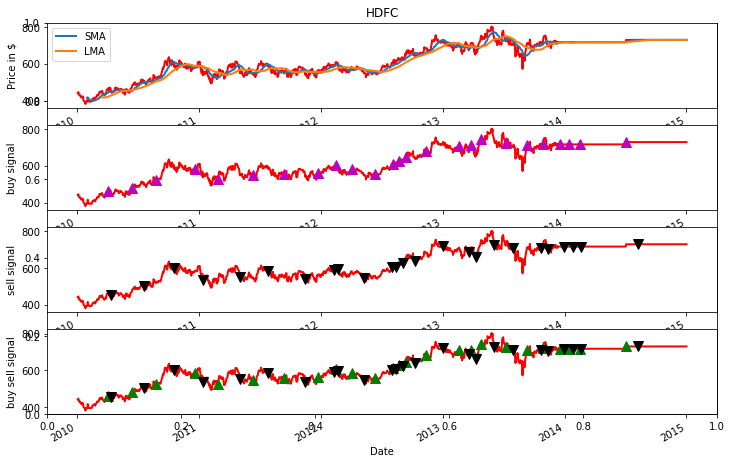

In [36]:
plot_macd_buy_sell(macd_data, macd_signals, symbol = symbol)

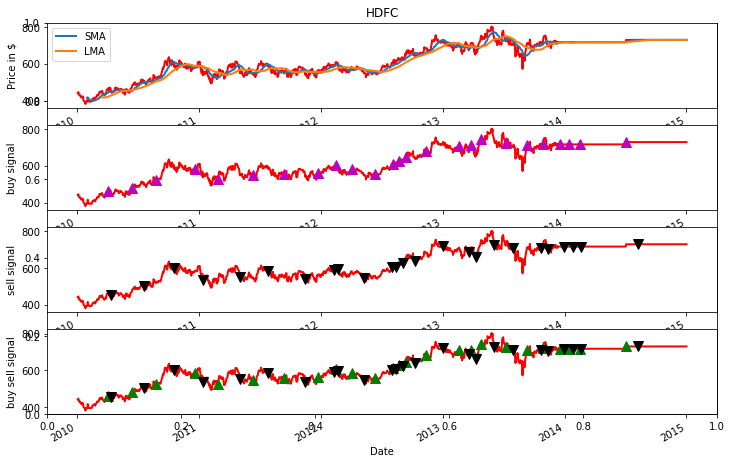

In [37]:
plot_macd_buy_sell(macd_data, macd_signals_from_signalline, symbol = symbol)